In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt

np.random.seed(1)

In [2]:
# Step a

w0 =  np.random.uniform(-1/4, 1/4, 1)[0]
w0

-0.041488997648713

In [3]:
# Step b

w1 =  np.random.uniform(-1, 1, 1)[0]
w1

0.4406489868843162

In [4]:
# Step c

w2 =  np.random.uniform(-1, 1, 1)[0]
w2

-0.9997712503653102

In [5]:
S = np.random.uniform(-1, 1, (100, 2))
S.shape

(100, 2)

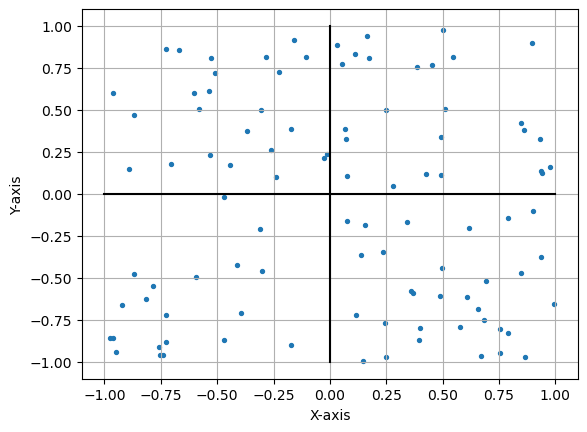

In [6]:
plt.scatter(S[:, 0], S[:, 1], s=8)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.plot([0,0], [-1,1], color='black', linestyle='-')
plt.plot([-1,1], [0,0], color='black', linestyle='-')
plt.grid()
plt.savefig('plot/dataset-100samples.png', dpi=400, bbox_inches="tight", transparent=True)

In [7]:
W_tb = np.array([w0, w1, w2])
X = np.insert(S, 0, np.ones(100), axis=1)
Y = X @ W_tb.T
T_tb = Y >= 0
T_tb.shape, Y.shape

((100,), (100,))

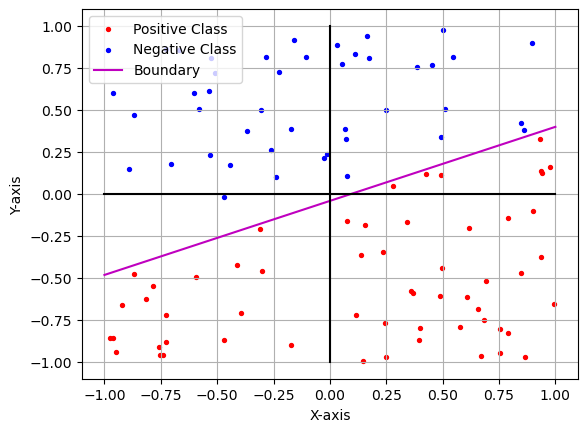

In [8]:
plt.scatter(S[T_tb, 0], S[T_tb, 1], color='r', s=8, label='Positive Class')
plt.scatter(S[np.logical_not(T_tb), 0], S[np.logical_not(T_tb), 1], color='b', s=8, label='Negative Class')
x2 = lambda x1: ((w0 + w1 * x1) / -w2)
x1 = np.arange(-1, 2)
plt.plot(x1, x2(x1), color='m', label='Boundary')
plt.plot([0,0], [-1,1], color='black', linestyle='-')
plt.plot([-1,1], [0,0], color='black', linestyle='-')
plt.legend(loc="upper left")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.savefig('plot/dataset-100samples-classified.png', dpi=400, bbox_inches="tight", transparent=True)

In [9]:
W_1 = np.random.uniform(-1, 1, 3)

[ 0.28313242  2.17385866 -6.66608558]
[43, 6, 6, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0]


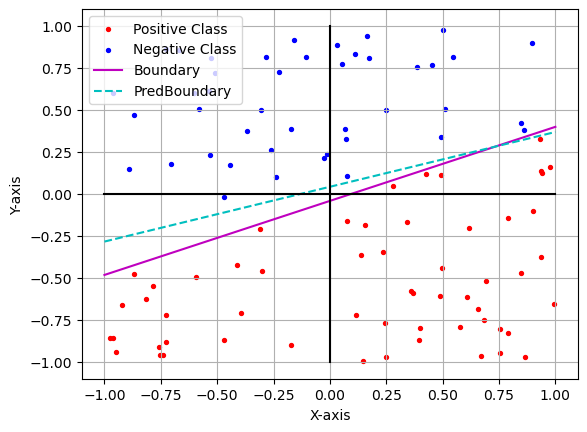

In [10]:
# Hyperparameter
n = 1
epoch_number = 100

# Parameters
W = copy.deepcopy(W_1)

# History Trace
history_miss = list()

# Online Version
for epoch in range(epoch_number):
    T = np.heaviside(X @ W.T, 0)
    history_miss.append(np.logical_xor(T, T_tb).sum())
    if history_miss[-1] == 0:
        break
    for index, x in enumerate(X):
        y = np.heaviside(x @ W.T, 0)
        if T_tb[index] == 0 and y == 1:
            W = W - n * x
        elif T_tb[index] == 1 and y == 0:
            W = W + n * x
print(W)
print(history_miss)
plt.plot(history_miss, marker = 'o')
#plt.title("Curve of misprediction during epoches (n = 1, # of sample = 100)")
plt.xlabel('Number of epochs')
plt.ylabel('Number of misclassification')
plt.grid()
plt.savefig('plot/history-100samples-eta1.png', dpi=400, bbox_inches="tight", transparent=True)

plt.clf()

plt.scatter(S[T_tb, 0], S[T_tb, 1], color='r', s=8, label='Positive Class')
plt.scatter(S[np.logical_not(T_tb), 0], S[np.logical_not(T_tb), 1], color='b', s=8, label='Negative Class')
x1 = np.arange(-1, 2)
x2 = lambda x1: ((w0 + w1 * x1) / -w2)
plt.plot(x1, x2(x1), color='m', label='Boundary')

y_hat = lambda x1: ((W[0] + W[1] * x1) / -W[2])
plt.plot(x1, y_hat(x1), '--', color='c', label='PredBoundary')

plt.plot([0,0], [-1,1], color='black', linestyle='-')
plt.plot([-1,1], [0,0], color='black', linestyle='-')
plt.legend(loc="upper left")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.savefig('plot/pred-100samples-eta1.png', dpi=400, bbox_inches="tight", transparent=True)

[  0.28313242   7.42517593 -21.86268555]


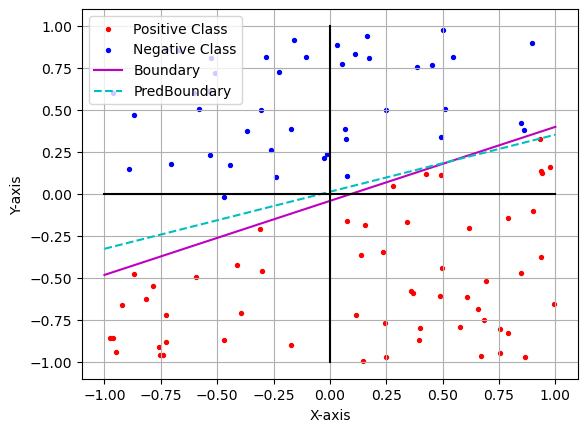

In [11]:
# Hyperparameter
n = 10
epoch_number = 100

# Parameters
W = copy.deepcopy(W_1)


# History Trace
history_miss = list()

# Online Version
for epoch in range(epoch_number):
    T = np.heaviside(X @ W.T, 0)
    history_miss.append(np.logical_xor(T, T_tb).sum())
    if history_miss[-1] == 0:
        break
    for index, x in enumerate(X):
        y = np.heaviside(x @ W.T, 0)
        if T_tb[index] == 0 and y == 1:
            W = W - n * x
        elif T_tb[index] == 1 and y == 0:
            W = W + n * x
print(W)
plt.plot(history_miss, marker = 'o')
#plt.title("Curve of misprediction during epoches (n = 10, # of sample = 100)")
plt.xlabel('Number of epochs')
plt.ylabel('Number of misclassification')
plt.grid()
plt.savefig('plot/history-100samples-eta10.png', dpi=400, bbox_inches="tight", transparent=True)

plt.clf()

plt.scatter(S[T_tb, 0], S[T_tb, 1], color='r', s=8, label='Positive Class')
plt.scatter(S[np.logical_not(T_tb), 0], S[np.logical_not(T_tb), 1], color='b', s=8, label='Negative Class')
x1 = np.arange(-1, 2)
x2 = lambda x1: ((w0 + w1 * x1) / -w2)
plt.plot(x1, x2(x1), color='m', label='Boundary')

y_hat = lambda x1: ((W[0] + W[1] * x1) / -W[2])
plt.plot(x1, y_hat(x1), '--', color='c', label='PredBoundary')

plt.plot([0,0], [-1,1], color='black', linestyle='-')
plt.plot([-1,1], [0,0], color='black', linestyle='-')
plt.legend(loc="upper left")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.savefig('plot/pred-100samples-eta10.png', dpi=400, bbox_inches="tight", transparent=True)

[-0.01686758  0.16282178 -0.3610968 ]


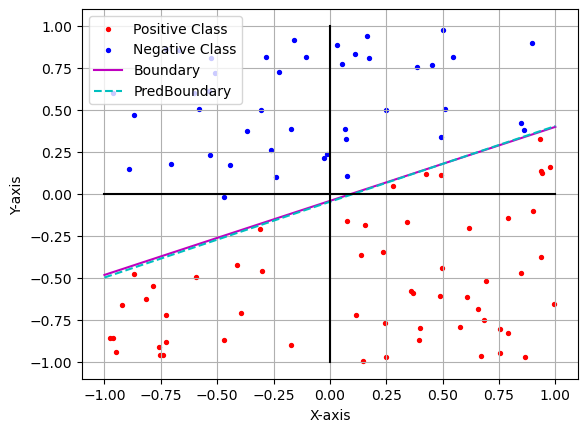

In [12]:
# Hyperparameter
n = 0.1
epoch_number = 100

# Parameters
W = copy.deepcopy(W_1)

# History Trace
history_miss = list()

# Online Version
for epoch in range(epoch_number):
    T = np.heaviside(X @ W.T, 0)
    history_miss.append(np.logical_xor(T, T_tb).sum())
    if history_miss[-1] == 0:
        break
    for index, x in enumerate(X):
        y = np.heaviside(x @ W.T, 0)
        if T_tb[index] == 0 and y == 1:
            W = W - n * x
        elif T_tb[index] == 1 and y == 0:
            W = W + n * x
            
print(W)
plt.plot(history_miss, marker = 'o')
#plt.title("Curve of misprediction during epoches (n = 0.1, # of sample = 100)")
plt.xlabel('Number of epochs')
plt.ylabel('Number of misclassification')
plt.grid()
plt.savefig('plot/history-100samples-eta01.png', dpi=400, bbox_inches="tight", transparent=True)

plt.clf()

plt.scatter(S[T_tb, 0], S[T_tb, 1], color='r', s=8, label='Positive Class')
plt.scatter(S[np.logical_not(T_tb), 0], S[np.logical_not(T_tb), 1], color='b', s=8, label='Negative Class')
x1 = np.arange(-1, 2)
x2 = lambda x1: ((w0 + w1 * x1) / -w2)
plt.plot(x1, x2(x1), color='m', label='Boundary')

y_hat = lambda x1: ((W[0] + W[1] * x1) / -W[2])
plt.plot(x1, y_hat(x1), '--', color='c', label='PredBoundary')

plt.plot([0,0], [-1,1], color='black', linestyle='-')
plt.plot([-1,1], [0,0], color='black', linestyle='-')
plt.legend(loc="upper left")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.savefig('plot/pred-100samples-eta01.png', dpi=400, bbox_inches="tight", transparent=True)

In [13]:
S = np.random.uniform(-1, 1, (1000, 2))
S.shape

(1000, 2)

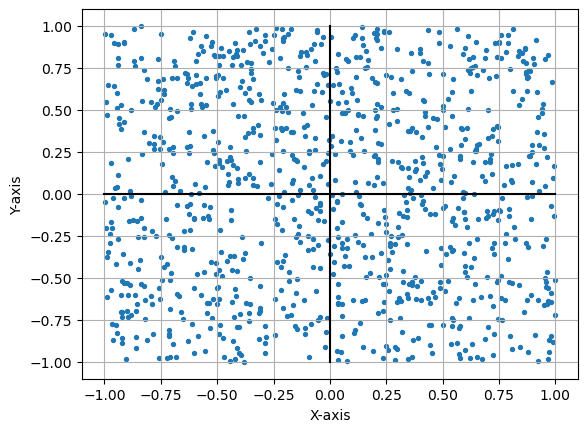

In [14]:
plt.scatter(S[:, 0], S[:, 1], s=8)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.plot([0,0], [-1,1], color='black', linestyle='-')
plt.plot([-1,1], [0,0], color='black', linestyle='-')
plt.grid()
plt.savefig('plot/dataset-1000samples.png', dpi=400, bbox_inches="tight", transparent=True)

In [15]:
W_tb = np.array([w0, w1, w2])
X = np.insert(S, 0, np.ones(1000), axis=1)
Y = X @ W_tb.T
T_tb = Y >= 0
T_tb.shape, Y.shape

((1000,), (1000,))

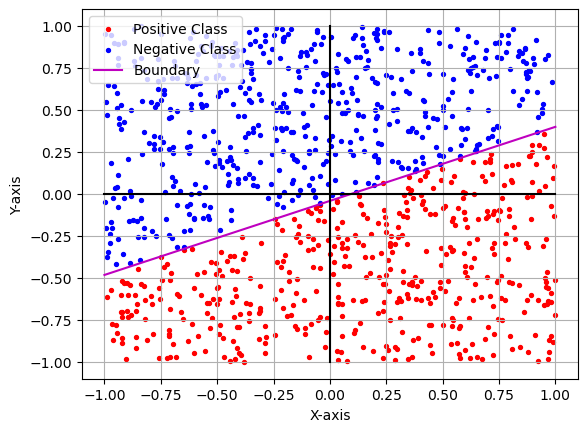

In [16]:
plt.scatter(S[T_tb, 0], S[T_tb, 1], color='r', s=8, label='Positive Class')
plt.scatter(S[np.logical_not(T_tb), 0], S[np.logical_not(T_tb), 1], color='b', s=8, label='Negative Class')
x2 = lambda x1: ((w0 + w1 * x1) / -w2)
x1 = np.arange(-1, 2)
plt.plot(x1, x2(x1), color='m', label='Boundary')
plt.plot([0,0], [-1,1], color='black', linestyle='-')
plt.plot([-1,1], [0,0], color='black', linestyle='-')
plt.legend(loc="upper left")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.savefig('plot/dataset-1000samples-classified.png', dpi=400, bbox_inches="tight", transparent=True)

[ -0.71686758   7.60064855 -17.14761834]
[531, 39, 26, 35, 35, 32, 30, 30, 30, 29, 7, 31, 29, 10, 8, 9, 8, 5, 5, 3, 9, 5, 4, 2, 8, 4, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0]


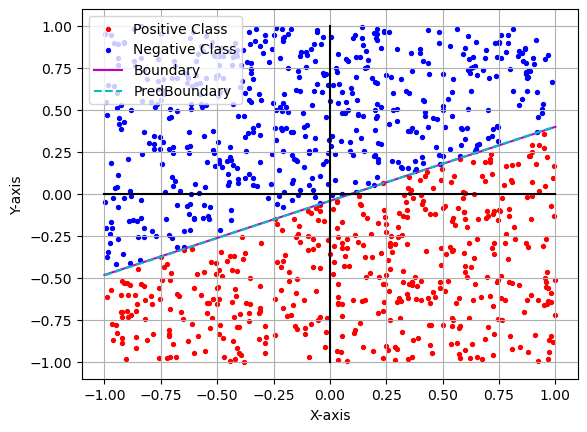

In [17]:
# Hyperparameter
n = 1
epoch_number = 100

# Parameters
W = copy.deepcopy(W_1)

# History Trace
history_miss = list()

# Online Version
for epoch in range(epoch_number):
    T = np.heaviside(X @ W.T, 0)
    history_miss.append(np.logical_xor(T, T_tb).sum())
    if history_miss[-1] == 0:
        break
    for index, x in enumerate(X):
        y = np.heaviside(x @ W.T, 0)
        if T_tb[index] == 0 and y == 1:
            W = W - n * x
        elif T_tb[index] == 1 and y == 0:
            W = W + n * x
print(W)            
print(history_miss)
plt.plot(history_miss)
#plt.title("Curve of misprediction during epoches (n = 1, # of sample = 1000)")
plt.xlabel('Number of epochs')
plt.ylabel('Number of misclassification')
plt.grid()
plt.savefig('plot/history-1000samples-eta1.png', dpi=400, bbox_inches="tight", transparent=True)

plt.clf()

plt.scatter(S[T_tb, 0], S[T_tb, 1], color='r', s=8, label='Positive Class')
plt.scatter(S[np.logical_not(T_tb), 0], S[np.logical_not(T_tb), 1], color='b', s=8, label='Negative Class')
x1 = np.arange(-1, 2)
x2 = lambda x1: ((w0 + w1 * x1) / -w2)
plt.plot(x1, x2(x1), color='m', label='Boundary')

y_hat = lambda x1: ((W[0] + W[1] * x1) / -W[2])
plt.plot(x1, y_hat(x1), '--', color='c', label='PredBoundary')

plt.plot([0,0], [-1,1], color='black', linestyle='-')
plt.plot([-1,1], [0,0], color='black', linestyle='-')
plt.legend(loc="upper left")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.savefig('plot/pred-1000samples-eta1.png', dpi=400, bbox_inches="tight", transparent=True)

[  -9.71686758  102.27900124 -231.20101237]
[531, 66, 20, 21, 21, 17, 28, 21, 15, 24, 20, 21, 20, 20, 21, 20, 16, 21, 15, 11, 20, 6, 6, 6, 6, 7, 9, 9, 5, 4, 8, 8, 8, 8, 7, 7, 5, 2, 2, 4, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0]


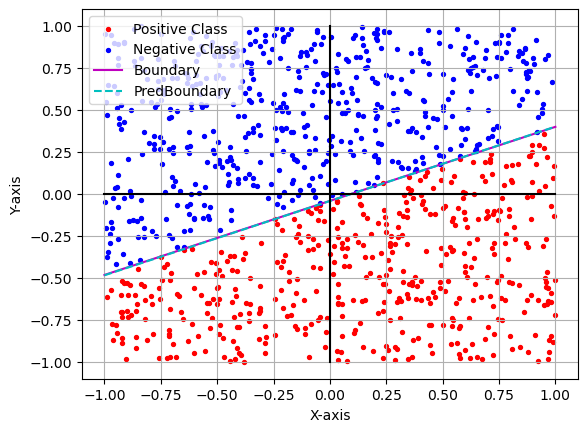

In [18]:
# Hyperparameter
n = 10
epoch_number = 100

# Parameters
W = copy.deepcopy(W_1)

# History Trace
history_miss = list()

# Online Version
for epoch in range(epoch_number):
    T = np.heaviside(X @ W.T, 0)
    history_miss.append(np.logical_xor(T, T_tb).sum())
    if history_miss[-1] == 0:
        break
    for index, x in enumerate(X):
        y = np.heaviside(x @ W.T, 0)
        if T_tb[index] == 0 and y == 1:
            W = W - n * x
        elif T_tb[index] == 1 and y == 0:
            W = W + n * x
print(W)
print(history_miss)
plt.plot(history_miss)
#plt.title("Curve of misprediction during epoches (n = 10, # of sample = 1000)")
plt.xlabel('Number of epochs')
plt.ylabel('Number of misclassification')
plt.grid()
plt.savefig('plot/history-1000samples-eta10.png', dpi=400, bbox_inches="tight", transparent=True)

plt.clf()

plt.scatter(S[T_tb, 0], S[T_tb, 1], color='r', s=8, label='Positive Class')
plt.scatter(S[np.logical_not(T_tb), 0], S[np.logical_not(T_tb), 1], color='b', s=8, label='Negative Class')
x1 = np.arange(-1, 2)
x2 = lambda x1: ((w0 + w1 * x1) / -w2)
plt.plot(x1, x2(x1), color='m', label='Boundary')

y_hat = lambda x1: ((W[0] + W[1] * x1) / -W[2])
plt.plot(x1, y_hat(x1), '--', color='c', label='PredBoundary')

plt.plot([0,0], [-1,1], color='black', linestyle='-')
plt.plot([-1,1], [0,0], color='black', linestyle='-')
plt.legend(loc="upper left")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.savefig('plot/pred-1000samples-eta10.png', dpi=400, bbox_inches="tight", transparent=True)

[-0.11686758  1.23037054 -2.77551764]
[531, 24, 10, 15, 11, 14, 10, 14, 16, 12, 11, 11, 17, 12, 17, 17, 16, 17, 15, 16, 17, 12, 17, 12, 11, 14, 12, 17, 14, 12, 17, 16, 13, 17, 14, 17, 14, 17, 18, 7, 8, 11, 18, 7, 7, 7, 7, 6, 6, 7, 6, 6, 6, 5, 5, 9, 9, 8, 8, 7, 7, 7, 7, 7, 5, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


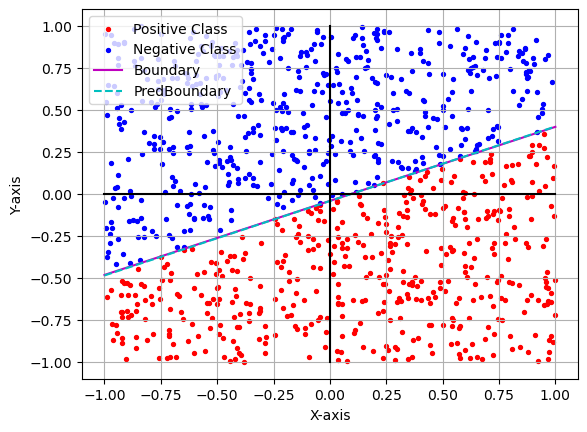

In [19]:
# Hyperparameter
n = 0.1
epoch_number = 10000

# Parameters
W = W_1

# History Trace
history_miss = list()

# Online Version
for epoch in range(epoch_number):
    T = np.heaviside(X @ W.T, 0)
    history_miss.append(np.logical_xor(T, T_tb).sum())
    if history_miss[-1] == 0:
        break
    for index, x in enumerate(X):
        y = np.heaviside(x @ W.T, 0)
        if T_tb[index] == 0 and y == 1:
            W = W - n * x
        elif T_tb[index] == 1 and y == 0:
            W = W + n * x
print(W)
print(history_miss)
plt.plot(history_miss)
#plt.title("Curve of misprediction during epoches (n = 0.1, # of sample = 1000)")
plt.xlabel('Number of epochs')
plt.ylabel('Number of misclassification')
plt.grid()
plt.savefig('plot/history-1000samples-eta01.png', dpi=400, bbox_inches="tight", transparent=True)

plt.clf()

plt.scatter(S[T_tb, 0], S[T_tb, 1], color='r', s=8, label='Positive Class')
plt.scatter(S[np.logical_not(T_tb), 0], S[np.logical_not(T_tb), 1], color='b', s=8, label='Negative Class')
x1 = np.arange(-1, 2)
x2 = lambda x1: ((w0 + w1 * x1) / -w2)
plt.plot(x1, x2(x1), color='m', label='Boundary')

y_hat = lambda x1: ((W[0] + W[1] * x1) / -W[2])
plt.plot(x1, y_hat(x1), '--', color='c', label='PredBoundary')

plt.plot([0,0], [-1,1], color='black', linestyle='-')
plt.plot([-1,1], [0,0], color='black', linestyle='-')
plt.legend(loc="upper left")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.savefig('plot/pred-1000samples-eta01.png', dpi=400, bbox_inches="tight", transparent=True)